# Check Person Employment Length and Person Age

In [1]:
%load_ext autoreload
%autoreload 2

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


In [2]:
import pandas
import numpy
import matplotlib.pyplot as plt
import itertools
import sklearn
from sklearn.metrics import log_loss
from sklearn import preprocessing

In [3]:
import loan_approval_lib
from loan_approval_lib import logspace, linspace

In [4]:
data = loan_approval_lib.load_original_data()

# Data Cleaning

In [6]:
columns = [
    'person_age',
    'person_income',
    'person_emp_length',
    'loan_amnt',
    'loan_int_rate',
    'loan_percent_income',
    'cb_person_default_on_file'
]

for column in columns:
    row_count_1 = len(data)

    if column == 'person_age':
        data = data[data['person_age'] <= 100]

    if column == 'person_emp_length':
        data = data[data['person_emp_length'] <= 100]

    data = data[data[column].isna() == False]
    
    row_count_2 = len(data)
    row_count_diff = row_count_1 - row_count_2
    print(f'column {column}, number of removed rows: {row_count_diff}')
    

column person_age, number of removed rows: 5
column person_income, number of removed rows: 0
column person_emp_length, number of removed rows: 897
column loan_amnt, number of removed rows: 0
column loan_int_rate, number of removed rows: 3047
column loan_percent_income, number of removed rows: 0
column cb_person_default_on_file, number of removed rows: 0


# Look for outliers where employment length is large compared to age

In [12]:
data['person_age_sub_person_emp_length'] = data['person_age'] - data['person_emp_length']

In [13]:
data_loan_status_deny = data[data['loan_status'] == 1]
data_loan_status_approve = data[data['loan_status'] == 0]

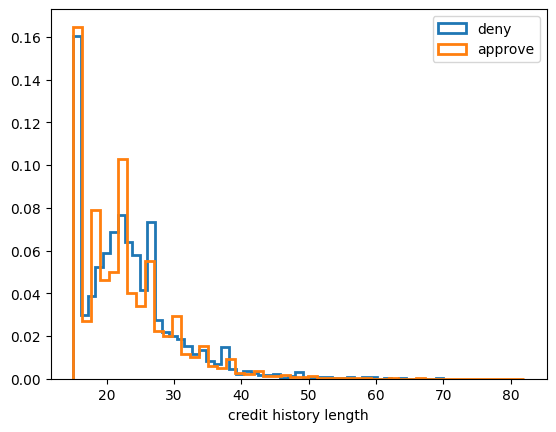

In [14]:
column = 'person_age_sub_person_emp_length'

data_deny = data_loan_status_deny[column]
data_accept = data_loan_status_approve[column]

plt.hist(
    data_deny,
    bins=50, #numpy.linspace(0, 30, 30), #logspace(data_train_loan_status_deny[column]),
    histtype='step',
    density=True,
    label='deny',
    linewidth=2,
)
plt.hist(
    data_accept,
    bins=50, #numpy.linspace(0, 30, 30), #logspace(data_train_loan_status_accept[column]),
    histtype='step',
    density=True,
    label='approve',
    linewidth=2,
)
#plt.xlim(left=0, right=30)
plt.xlabel('credit history length')
#plt.xscale('log')
plt.legend()
None